# Chaos: An Extremely Brief Primer

## Is the weather random?
From time-to-time you might hear that the atmosphere (or even the Earth System, more generally) is "chaotic." What does that mean? Does it mean that things like hurricanes, and weather systems behave in a truly random way and can never be predicted, as the term "chaos" seems to imply? 

In short, "no." The Earth System and atmosphere do not, as far as we know, demonstrate truly random behavior in same way that happens when you roll a pair of dice or draw randomly from a deck of well-shuffled cards. The atmosphere is, in fact, a deterministic system that conforms to fundamental laws that conserve mass, energy, and momentum. We can, and have, written down the equations that describe the motion of air within the Earth's atmosphere by applying these fundamental principles of conservation, and by using some important mathematical principles that allow us to account for the fact that we're on a rotating, approximately sphere planet.  

## Then what is chaos?
If we, in fact, know the equations describing the movement of air in Earth's atmosphere, then why is it said that it is chaotic? There are, unfortunately a few major problems with the equations of motion as they are known:

1. As far as we know, there is no analytical and closed-form solution to those equations. That is, we cannot rearrange the terms of the equation such that we get expressions for the velocity, pressure, temperature, and humidity everywhere in the atmosphere as a function of things that are known. The equations must be solved numerically on high performance computing clusters, which requires that we turn these continuous equations into a numerical model based on discrete equations - something that requires that we assume the those state variables are approximately linear if we take small steps in space and time.
2. The form of the equations are strongly nonlinear. What this means is that there are terms that appear in the governing equations that have state variables (velocity, in particular) that are multiplied by derivatives of themselves. As a result, the underlying variables of interest  change very rapidly with small changes in either distance, time, or both. And because we have to develop numerical approximations that assume locally linear behavior, our numerical approximations grow increasingly bad the further out into the future we integrate our model. Moreover, the bigger the spatial or temporal step we take when solving those equations, the more quickly our model begins to diverge from the true state.   
3. The same numerical approximations to the governing equations require that we start with an initial guess of "state" of the atmosphere: the spatial distribution of velocity, pressure, temperature, and humidity at the beginning of our model run. While satellite data and surface meteorological observations provide us a pretty good estimate of the state of the atmosphere, there are nevertheless uncertainties in that estimate (and likely always will be). 

Putting these factors together the upshot is that we don't perfectly know the initial condition we need to start our model and, because the atmosphere is so nonlinear, those errors in the initial condition can become very large very rapidly because of the numerically approximate nature of our model. This is more appropriately termed "sensitive dependence to the initial conditions." That is, small errors in our understanding of the initial condition grow ever larger the further out into the future we run the model. Importantly, this is not to say that the model produces physically unrealistic or impossible solutions in the future (i.e., that the model "diverges" from reality). The predictions the model generates will be consistent with the physics of the problem, just exceedingly unlikely to occur as predicted.   

## How was this sensitive dependence discovered?

In this Jupyter Notebook, we're going to approximate the experiment that the late Ed Lorenz, a professor of Atmospheric Science at MIT, performed in which he accidentally discovered what is now called chaos. 

![EdLorenz](img/Edward_lorenz.jpg)

In the 1960s (and even today), running models of the atmosphere required significant computational power. To explore some of the behavior of the predictability of the atmosphere, Ed Lorenz (along with other colleagues outside of MIT) developed relatively simple models that exhibited some of the mathematical behavior of the atmosphere, without being nearly as large or complex as full atmospheric models. In today's nomenclature, we might wall them "toy models." They sufficiently simple that we can run them many thousands of times on a laptop. But they also mimic some of the key nonlinearities of the atmospheric system and, therefore, provide us with some important insights about how atmospheric models behave mathematically. There are many different kinds of these nonlinear "toy models," but here we will use the one that Ed Lorenz developed in 1963 on which he discovered sensitive dependence for the first time. 

## A toy model of the atmosphere

We will introduce the model in so-called "state space" form. The model has 3 dimensions, which you can think of as something "like" a velocity, temperature, and pressure. These equations are aspatial, there is no notion of space in the models, but they are dynamic - they evolve in time. The model is a set of three ordinary differential equations (ODEs) that describe the instantaneous rate of change in time of each of the state variables ($x_1$, $x_2$, and $x_3$) as a function of the current value of the state variables and some parameters ($\alpha_1$, $\alpha_2$, and $\alpha_3$). That system of ODEs is given as follows:

$\frac{dx_1}{dt} = -\alpha_1*x_1 + \alpha_1*x_2$

$\frac{dx_2}{dt} = -x_1*x_3 + \alpha_2*x_1 - x_2$

$\frac{dx_3}{dt} = x_1*x_2 - \alpha_3*x_3$

A couple things to note about this system of equations. First, there is no randomness - the equations are deterministic in nature. Second, The equations exhibit important nonlinearities wherein the rate of change of two state variables ($x_2$ and $x_3$) are a product of $x_1$. 

Let's start to set up a numerical solution to this system of equations in Python as follows: 

In [36]:
import numpy as np
from scipy.integrate import ode

X0 = [10,20,30]
t0 = 0
dt = 0.01

arg1 = 10
arg2 = 28
arg3 = 8/3

nt_spinup = 512 
nt_run = 512

def f(t,X,arg1,arg2,arg3):
    X1dot = -arg1*X[0] + arg1*X[1]
    X2dot = -X[0]*X[2] + arg2*X[0] - X[1]
    X3dot =  X[0]*X[1] - arg3*X[2]
    return [X1dot, X2dot, X3dot] 

## Spinning the model up

In [ ]:
r = ode(f).set_integrator('vode', method='bdf', with_jacobian=False)
r.set_initial_value(X0,t0).set_f_params(arg1,arg2,arg3)

while r.successful() and r.t < nt_spinup:
    r.integrate(r.t+dt)

Xa = [r.y[0],r.y[1],r.y[2]]

## Running the model forward in time

In [37]:
r.set_initial_value(Xa,t0).set_f_params(arg1,arg2,arg3)

X = np.zeros(shape=(3,int(nt_run/dt)))
i = 0
while r.successful() and r.t < nt_spinup - dt:
    r.integrate(r.t+dt)
    X[0,int(i)] = r.y[0]
    X[1,int(i)] = r.y[1]
    X[2,int(i)] = r.y[2]
    i = i + 1
    

## Looking at the "output" of the model

Let's create a quick plot of the output of the model. In all likelihood you have seen these outputs before, but probably never knew where they came from. Remember that this is a 3-dimensional model, so the output can be plotted in a 3D plot. Again, there's no physical realism to this model; the axes don't really have units, the length of the "model run" doesn't really mean anything, and the three state variables don't really represent anything (but if it helps, think of it as velocity, temperature, and pressure).  

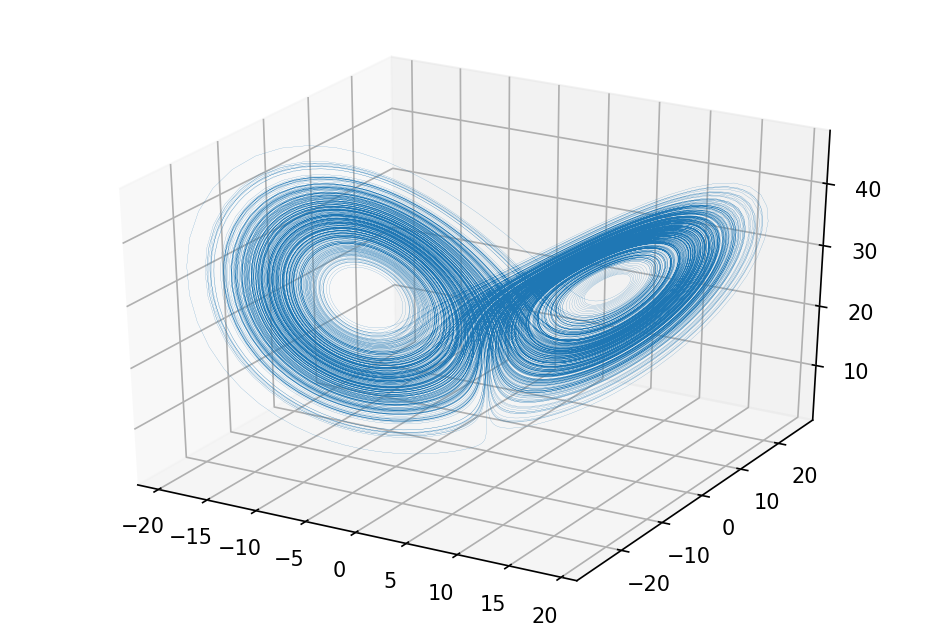

In [47]:
import pylab as plt
import mpl_toolkits.mplot3d.axes3d as plt3

fig = plt.figure(figsize=(6,4), dpi=150)
ax  = plt3.Axes3D(fig)

ax.plot3D(X[0,],X[1,],X[2,],linewidth=0.075)
plt.show()

This is the well known "butterfly" attractor. As you can see, the "model" has two distinct behaviors or "climatologies." There is one "wing" of the butterfly in which the state variables look to oscillate in a plane around some central coordinate. Some of these trajectories seemingly "jump" off one wing and onto another wing of the butterfly into another, alternate climatology in which the variables oscillate in a plane (with a different orientation) around some other point in space. If you look really, really close you can see that some of those trajectories that "switch" from oscillating on one of the butterfly's wings to the other wing seem to be exceedingly close to nearby trajectories that continue to circulate in a plane on the same wing. This is our first clue as to how this sensitive dependence to initial conditions expresses itself.